In [1]:
import torch
import torchvision
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

from dlvc.datasets.dataset import Subset
from dlvc.datasets.cifar10 import CIFAR10Dataset

In [2]:
fdir = "data\\cifar-10-batches-py"


classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
transform = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])

augmentations = v2.Compose([
    # Randomly flip the image horizontally
    v2.RandomHorizontalFlip(),
    # Randomly rotate the image
    v2.RandomRotation(120),
    # Randomly crop and resize
    v2.RandomResizedCrop(32, scale=(0.6, 1.0), ratio=(0.8, 1.2)),
    # Convert the image to a PyTorch tensor
])
augmentation_transform = v2.Compose([
    v2.ToImage(),
    # Randomly flip the image horizontally
    v2.RandomHorizontalFlip(),
    # Randomly rotate the image
    v2.RandomRotation(120),
    # Randomly crop and resize
    v2.RandomResizedCrop(32, scale=(0.6, 1.0), ratio=(0.8, 1.2)),
    # Convert the image to a PyTorch tensor
    v2.ToDtype(torch.float32, scale=True),
    # Normalize the image with mean and standard deviation
    #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [15]:
transform = v2.Compose([v2.ToImage(),v2.RandomApply(augmentations, p=0.5), v2.ToDtype(torch.float32, scale=True)])

TypeError: Argument transforms should be a sequence of callables or a `nn.ModuleList`

In [11]:
training_data = CIFAR10Dataset(fdir=fdir, subset=Subset.TRAINING, transform=transform)
validation_data = CIFAR10Dataset(fdir=fdir, subset=Subset.VALIDATION)
test_data = CIFAR10Dataset(fdir=fdir, subset=Subset.TEST)

In [5]:
training_data.images.shape

(40000, 32, 32, 3)

In [6]:
training_data.labels.shape

(40000,)

In [12]:
train_data_loader = torch.utils.data.DataLoader(training_data, batch_size=8, shuffle=False, num_workers=0)

In [8]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [9]:
images.shape

NameError: name 'images' is not defined

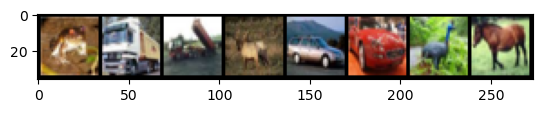

In [13]:
dataiter = iter(train_data_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

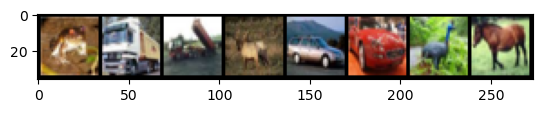

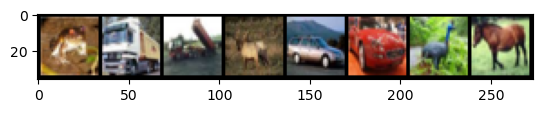

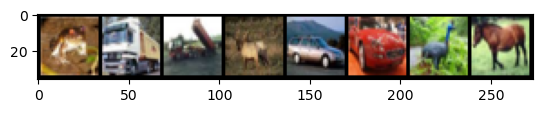

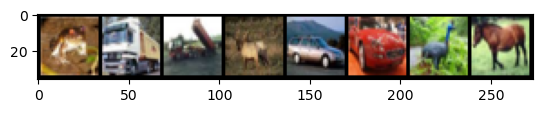

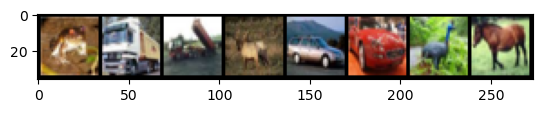

In [14]:
for epoch in range(5):
    show = True
    for i, data in enumerate(train_data_loader, 0):
        inputs, labels = data
        if show:
            imshow(torchvision.utils.make_grid(inputs))
            show = False
        pass

In [ ]:
for epoch in range(5):
    cnt = 0
    for i, (images, labels) in enumerate(train_data_loader):
        cnt += 1

In [ ]:
m = nn.Softmax(-1)

In [ ]:
input = torch.randn(2, 3)
m(input)

tensor([[0.2212, 0.2743, 0.5045],
        [0.0776, 0.3404, 0.5819]])

In [ ]:
validation_data_loader = torch.utils.data.DataLoader(validation_data, batch_size=8, shuffle=False, num_workers=2)

In [ ]:
for epoch in range(5):
    show = True
    for i, data in enumerate(validation_data_loader, 0):
        inputs, labels = data
        if show:
            imshow(torchvision.utils.make_grid(inputs))
            show = False
        pass

In [ ]:
train_data = CIFAR10Dataset(fdir=fdir, subset=Subset.TRAINING, transform=transform)


torch.Tensor(train_data._load_cifar10(f'data_batch_{1}')[1])

tensor([6., 9., 9.,  ..., 1., 1., 5.])